In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


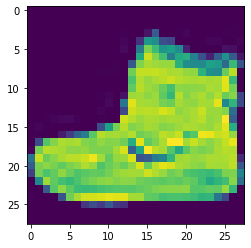

In [4]:
plt.imshow(x_train[0])

In [9]:
print(str(len(x_train)) + ', ' +str(len(x_test)))

60000, 10000


In [10]:
random_img = x_train[0]
random_img.max()

255

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Prepare the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [18]:
model.fit(x_train,
          y_cat_train,
          epochs=10,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop],
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4112 - accuracy: 0.8529 - val_loss: 0.3437 - val_accuracy: 0.8834
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2780 - accuracy: 0.9004 - val_loss: 0.3007 - val_accuracy: 0.8926
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2404 - accuracy: 0.9140 - val_loss: 0.2689 - val_accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2147 - accuracy: 0.9229 - val_loss: 0.2615 - val_accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1928 - accuracy: 0.9311 - val_loss: 0.2877 - val_accuracy: 0.9051
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1795 - accuracy: 0.9362 - val_loss: 0.2790 - val_accuracy: 0.9084


Evaluate the model

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
losses= pd.DataFrame(model.history.history)

In [23]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.411162,0.852883,0.343701,0.8834
1,0.278039,0.900433,0.300711,0.8926
2,0.240371,0.914050,0.268900,0.9057
3,0.214667,0.922917,0.261509,0.9088
4,0.192790,0.931067,0.287686,0.9051


<AxesSubplot:>

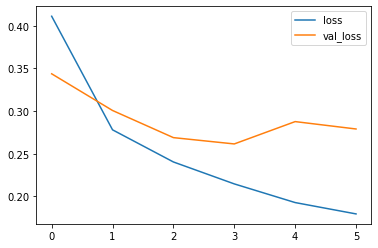

In [24]:
losses[['loss','val_loss']].plot()

In [25]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.27902668714523315, 0.9083999991416931]


In [28]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.88      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.82      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.70      0.79      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
confusion_matrix(y_test,pred)

array([[808,   0,  16,  17,   3,   1, 151,   0,   4,   0],
       [  2, 976,   1,  11,   2,   1,   5,   0,   2,   0],
       [ 14,   0, 883,   7,  41,   0,  55,   0,   0,   0],
       [ 11,   5,  11, 917,  19,   1,  35,   0,   1,   0],
       [  0,   1,  73,  24, 821,   1,  80,   0,   0,   0],
       [  0,   0,   0,   0,   0, 987,   0,  10,   0,   3],
       [ 69,   0,  76,  22,  44,   0, 786,   0,   3,   0],
       [  0,   0,   0,   0,   0,  10,   0, 974,   1,  15],
       [  2,   1,   3,   3,   1,   5,   3,   5, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  33,   0, 955]], dtype=int64)

<AxesSubplot:>

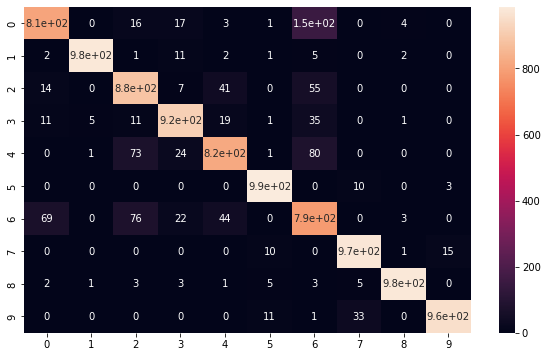

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [35]:
my_number = x_test[69]

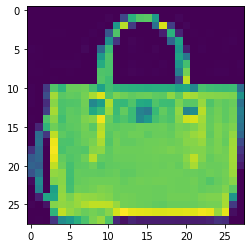

In [37]:
plt.imshow(x_test[69])

In [38]:
mod1=model.predict(my_number.reshape(1,28,28,1))
np.argmax(mod1,axis=1)

1/1 [==============================] - 0s 126ms/step


array([8], dtype=int64)

In [39]:
# https://www.tensorflow.org/datasets/catalog/fashion_mnist
# a bag. noice